In [1]:
# !pip installations

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
from scipy import stats

C:\Users\Lawre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# loading the data
customerData = pd.read_csv('c:/quantium_sandbox/QVI_purchase_behaviour.csv')
transactionData = pd.read_excel('c:/quantium_sandbox/QVI_transaction_data.xlsx')

In [4]:
# picking through the data
customerData.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


# Exploratory Data Analysis on the Customer Data

In [5]:
customerData.shape

(72637, 3)

In [6]:
customerData.tail(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72627,2330501,OLDER SINGLES/COUPLES,Budget
72628,2370001,OLDER SINGLES/COUPLES,Premium
72629,2370181,YOUNG SINGLES/COUPLES,Mainstream
72630,2370361,OLDER SINGLES/COUPLES,Budget
72631,2370581,OLDER SINGLES/COUPLES,Budget
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [7]:
# checking the properties of the data
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
# checking for missing values
customerData.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [9]:
# Inspecting for duplicates 
print('Duplicates in the data:', customerData.duplicated().sum())
customerData[customerData.duplicated()]

Duplicates in the data: 0


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


In [10]:
# checking for the unique values in each column in the data, and by extention, checking mislabeling & incorrect data entry
cols = customerData.columns
for col in cols:
    print(col, customerData[col].unique())
    print()

LYLTY_CARD_NBR [   1000    1002    1003 ... 2370751 2370961 2373711]

LIFESTAGE ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']

PREMIUM_CUSTOMER ['Premium' 'Mainstream' 'Budget']



<AxesSubplot:ylabel='Density'>

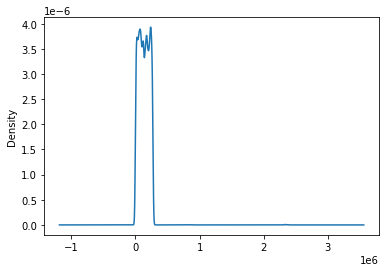

In [11]:
# checking for distribution in the numeric column
customerData.LYLTY_CARD_NBR.plot(kind = 'density')

C:\Users\Lawre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LYLTY_CARD_NBR'>

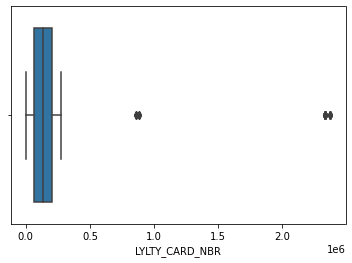

In [12]:
# inspecting for outliers
sns.boxplot(customerData.LYLTY_CARD_NBR)

Inference from Customer behaviour data:
    * there are 72637 rows and 3 columns in the data with two objects and one int as datatypes
    * there are no missing values in the data. All cells have an entry in them
    * there are no duplicates in the data
    * No occurences of datatype mismatch and spurious data entry or label variations in the data 
    * However, there are presence of outliers in the 'LYLTY_CARD_NBR' column. No treatment needed as 
    the column exist in the transaction data.

# Exploratory Data analysis on the Transaction Data

In [13]:
# checking the shape of the data
transactionData.shape

(264836, 8)

In [14]:
# checking the properties of the data
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [15]:
# checking for missing values in the data
transactionData.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [16]:
# inspecting for duplicates 
print('Total duplicates in the data:', transactionData.duplicated().sum())
transactionData[transactionData.duplicated()]

Total duplicates in the data: 1


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [17]:
# checking for unique labels in all columns in the data. This also checks for mislabelling and incorrect data entry
colss = transactionData.columns
for col in colss:
    print(col, transactionData[col].unique())
    print()

DATE [43390 43599 43605 43329 43330 43604 43601 43332 43602 43603 43600 43326
 43328 43331 43327 43633 43348 43370 43523 43543 43632 43429 43414 43533
 43405 43537 43561 43311 43391 43409 43528 43535 43576 43468 43366 43624
 43313 43448 43587 43474 43566 43529 43369 43554 43519 43451 43564 43563
 43382 43407 43489 43510 43627 43284 43299 43309 43552 43593 43611 43526
 43578 43584 43357 43494 43547 43550 43318 43467 43555 43294 43386 43496
 43504 43520 43583 43321 43446 43568 43643 43646 43287 43562 43423 43434
 43479 43333 43508 43634 43436 43458 43463 43579 43620 43622 43345 43361
 43482 43617 43625 43288 43352 43360 43404 43290 43323 43363 43399 43402
 43551 43556 43365 43367 43439 43518 43539 43639 43292 43395 43450 43462
 43503 43336 43375 43381 43534 43644 43295 43509 43325 43400 43443 43502
 43607 43302 43387 43412 43536 43424 43499 43515 43608 43308 43428 43484
 43316 43470 43572 43355 43481 43571 43344 43590 43475 43507 43641 43531
 43430 43389 43438 43306 43408 43419 43615 433

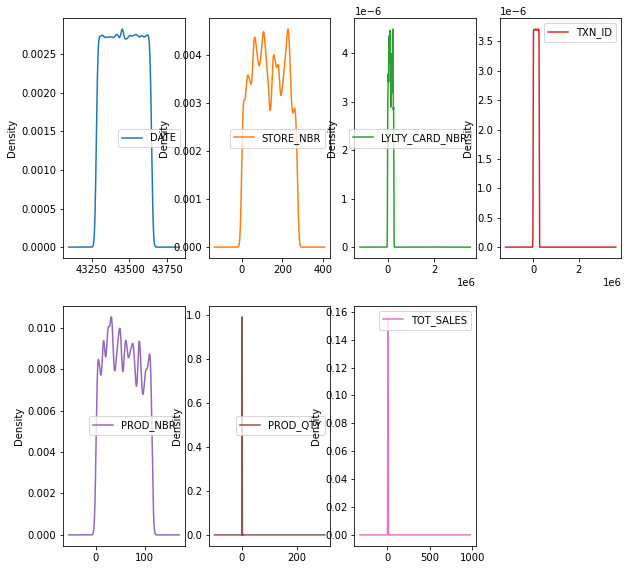

In [18]:
# checking for distributions in the numeric columns in the data
transactionData.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

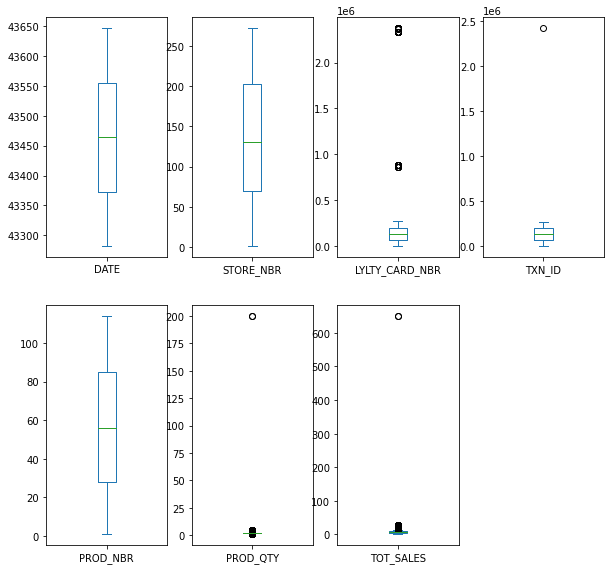

In [19]:
# inspecting for outliers in all the numeric columns in the data using boxplot
transactionData.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

Inference from the tranaction data:
    * there are 264836 rows and 8 columns in the data with one objects, six ints and one float as datatypes
    * the DATE column is in excel numerical values. Conversion to proper datetime needed.
    * there are no missing values in the data. All cells have an entry in them
    * there is one occurence of duplicates in the data
    * No occurences of datatype mismatch and spurious data entry or label variations in the categorical variables 
    * there are presence of outliers in the four columns. Treatment for outliers needed.

In [20]:
# dropping the duplicates in the data
transactionData.drop_duplicates(keep= 'first', inplace=True)

In [21]:
# cross checking after dropping the duplicates in the data
transactionData[transactionData.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [22]:
# converting numerical values to proper date format
def convert_excel_date(x):
    base_date = datetime(1899, 12, 30)
    return base_date + timedelta(days=int(x))

transactionData['DATE'] = transactionData['DATE'].apply(convert_excel_date)

In [23]:
# cleaning required for the prod_name columns before using it for brand feature engineering.
# examining the values of PROD_NAME and their counts
prod_name_counts = transactionData['PROD_NAME'].value_counts().reset_index()
prod_name_counts.columns = ['PROD_NAME', 'Count']
prod_name_counts

,PROD_NAME,Count
0,Kettle Mozzarella Basil & Pesto 175g,3304
1,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
2,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
3,Tyrrells Crisps Ched & Chives 165g,3268
4,Cobs Popd Sea Salt Chips 110g,3265
...,...,...
109,RRD Pc Sea Salt 165g,1431
110,Woolworths Medium Salsa 300g,1430
111,NCC Sour Cream & Garden Chives 175g,1419
112,French Fries Potato Chips 175g,1418


In [24]:
# creating a list of unique words from PROD_NAME
unique_product_names = transactionData['PROD_NAME'].unique()
product_words = []
for name in unique_product_names:
    product_words.extend(name.split())

# creating a DataFrame with the list of product words
product_words_df = pd.DataFrame(product_words, columns=['words'])

print(product_words_df)

           words
0        Natural
1           Chip
2         Compny
3    SeaSalt175g
4            CCs
..           ...
584         150g
585      Doritos
586        Salsa
587         Mild
588         300g

[589 rows x 1 columns]


In [25]:
# removing digits
product_words_df = product_words_df[~product_words_df['words'].str.contains(r'\d')]

# removing special characters
product_words_df = product_words_df[product_words_df['words'].str.match(r'^[a-zA-Z]+$')]

# counting the frequency of words and sorting by frequency in descending order
word_frequencies = product_words_df['words'].value_counts().reset_index()
word_frequencies.columns = ['word', 'frequency']
word_frequencies = word_frequencies.sort_values(by='frequency', ascending=False)

print(word_frequencies)

          word  frequency
0        Chips         21
1       Smiths         16
2      Crinkle         14
3          Cut         14
4       Kettle         13
..         ...        ...
99      Vingar          1
98         Veg          1
97       Strws          1
96       Mango          1
167  Bolognese          1

[168 rows x 2 columns]


In [26]:
#There are salsa products in the dataset but we are only interested in the chips category, so let’s remove this
# converting PROD_NAME to lowercase and check if it contains "salsa"
transactionData['SALSA'] = transactionData['PROD_NAME'].str.lower().str.contains("salsa")

# removing products with "salsa" in their names
transactionData = transactionData[~transactionData['SALSA']]

# dropping the 'SALSA' column
transactionData = transactionData.drop(columns=['SALSA'])

print(transactionData)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [27]:
# counting the number of transactions by date
transactions_by_date = transactionData.groupby('DATE').size().reset_index()
transactions_by_date.columns = ['DATE', 'Transaction_Count']

print(transactions_by_date)

          DATE  Transaction_Count
0   2018-07-01                663
1   2018-07-02                650
2   2018-07-03                674
3   2018-07-04                669
4   2018-07-05                660
..         ...                ...
359 2019-06-26                657
360 2019-06-27                669
361 2019-06-28                673
362 2019-06-29                703
363 2019-06-30                704

[364 rows x 2 columns]


There’s only 364 rows, meaning only 364 dates which indicates a missing date. Let’s create a sequence of
dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to
find the missing date. and to find highest sales point in the data

C:\Users\Lawre\anaconda3\lib\site-packages\pandas\core\indexes\base.py:345: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.outer_join_indexer(sv, ov)


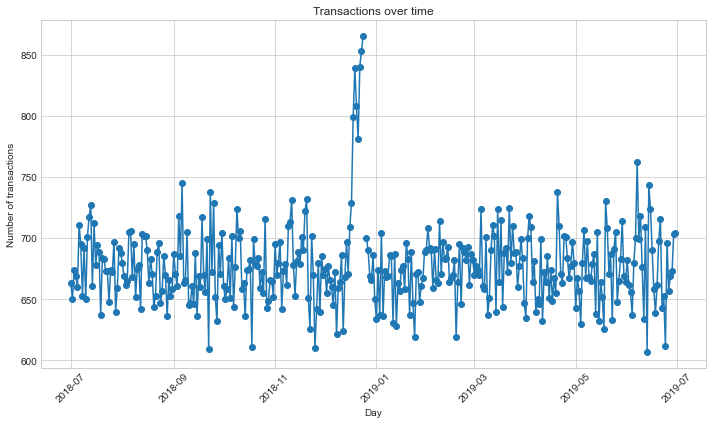

In [28]:
# creating a sequence of dates
start_date = date(2018, 7, 1)
end_date = date(2019, 6, 30)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]
all_dates = pd.DataFrame({'DATE': date_range})

# counting the number of transactions by date
transactions_by_date = transactionData.groupby('DATE').size().reset_index()
transactions_by_date.columns = ['DATE', 'Transaction_Count']

# merging the sequences of dates with the transaction counts using pd.concat
transactions_by_day = pd.concat([all_dates.set_index('DATE'), transactions_by_date.set_index('DATE')], axis=1, join='outer').reset_index()

# setting plot themes
plt.style.use('seaborn-whitegrid')

# ploting transactions over time using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(transactions_by_day['DATE'], transactions_by_day['Transaction_Count'], marker='o')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [29]:
'''from the chart above, we can see that there is an increase in purchases in December and a break in late December. 
Let’s zoom in on this by creating a chart for only the month of December.'''

'from the chart above, we can see that there is an increase in purchases in December and a break in late December. \nLet’s zoom in on this by creating a chart for only the month of December.'

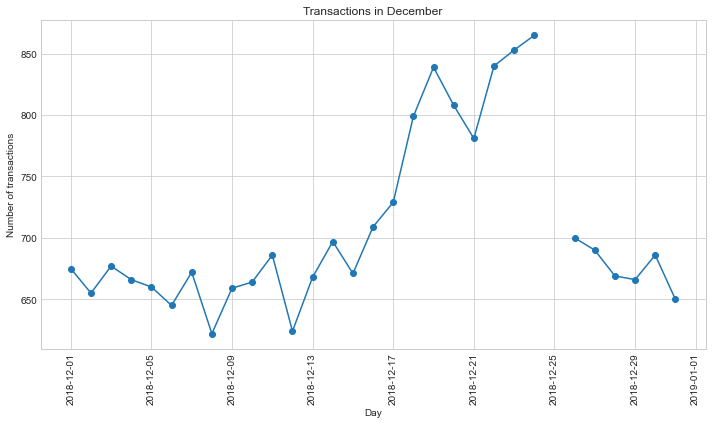

In [30]:
# converting the 'DATE' column to datetime format
transactions_by_day['DATE'] = pd.to_datetime(transactions_by_day['DATE'])

# filtering data for December
transactions_december = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]

# creating a line plot using matplotlib
plt.figure(figsize=(10, 6))

plt.plot(transactions_december['DATE'], transactions_december['Transaction_Count'], marker='o')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions in December')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [31]:
'''from the chart above, we can see that the increase in sales occurs in the lead-up to Christmas and that there are zero 
sales on Christmas day itself. This is due to shops being closed on Christmas day. Also, the highest sales point/period
is towards the end of the year - December.'''

'from the chart above, we can see that the increase in sales occurs in the lead-up to Christmas and that there are zero \nsales on Christmas day itself. This is due to shops being closed on Christmas day. Also, the highest sales point/period\nis towards the end of the year - December.'

In [32]:
# Treatment for outliers using the inter-quartile range method

def outlier_lims(data, col_names):
    indices_to_drop = []
    for col_name in col_names:
        col = data[col_name]
        q3, q1 = np.percentile(col, [75, 25])
        iqr = q3 - q1
        upper_lim = q3 + 1.5 * iqr
        lower_lim = q1 - 1.5 * iqr
        
        outliers_upper = col[col > upper_lim]
        outliers_lower = col[col < lower_lim]
        
        indices_to_drop.extend(outliers_upper.index)
        indices_to_drop.extend(outliers_lower.index)
    
    unique_indices_to_drop = list(set(indices_to_drop))
    
    return unique_indices_to_drop

In [33]:
# checking for outliers in the columns
column_names = ['PROD_QTY', 'LYLTY_CARD_NBR', 'TXN_ID', 'TOT_SALES']

indices_to_drop = outlier_lims(transactionData, column_names)

# dropping the rows with outlier indices
cleaned_df = transactionData.drop(indices_to_drop)

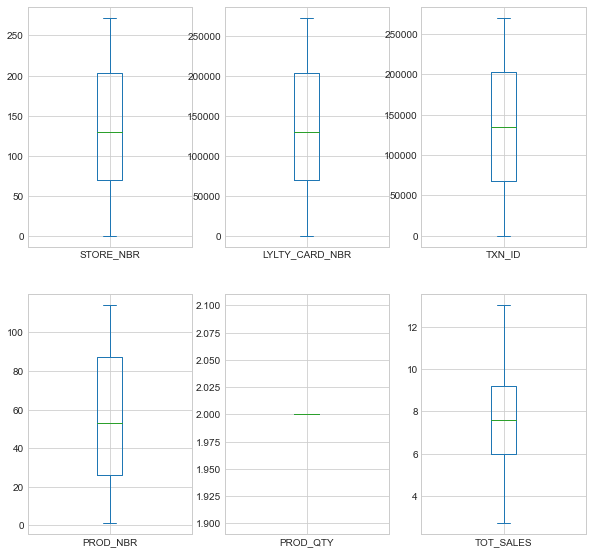

In [34]:
# inspecting for outliers in all the numeric columns in the data after outliers removal
cleaned_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

In [35]:
# there are 220036 rows remaining after outliers removal from the data
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220036 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            220036 non-null  datetime64[ns]
 1   STORE_NBR       220036 non-null  int64         
 2   LYLTY_CARD_NBR  220036 non-null  int64         
 3   TXN_ID          220036 non-null  int64         
 4   PROD_NBR        220036 non-null  int64         
 5   PROD_NAME       220036 non-null  object        
 6   PROD_QTY        220036 non-null  int64         
 7   TOT_SALES       220036 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 15.1+ MB


In [36]:
# feature engineering - creating pack_size and brand_name columns from the 'PROD_NAME' column
cleaned_df['PACK_SIZE'] = cleaned_df['PROD_NAME'].str.extract('(\d+)').astype(float)

cleaned_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210.0
12,2019-05-18,9,9208,8634,15,Twisties Cheese 270g,2,9.2,270.0
24,2018-08-15,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,150.0
...,...,...,...,...,...,...,...,...,...
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175.0
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0


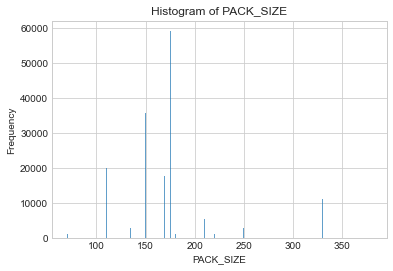

In [37]:
# creating a histogram of the PACK_SIZE column
plt.hist(cleaned_df['PACK_SIZE'], bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('PACK_SIZE')
plt.ylabel('Frequency')
plt.title('Histogram of PACK_SIZE')
plt.grid(True)
plt.show()

In [38]:
'''the pack sizes created look reasonable and now to create brands, using the first word in PROD_NAME to work out 
the brand name'''

'the pack sizes created look reasonable and now to create brands, using the first word in PROD_NAME to work out \nthe brand name'

In [39]:
# extracting brand names and converting to uppercase
cleaned_df['BRAND'] = cleaned_df['PROD_NAME'].str.split(' ', n=1).str[0].str.upper()

cleaned_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210.0,GRAIN
12,2019-05-18,9,9208,8634,15,Twisties Cheese 270g,2,9.2,270.0,TWISTIES
24,2018-08-15,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,150.0,KETTLE
...,...,...,...,...,...,...,...,...,...,...
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175.0,THINS
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,KETTLE
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,DORITOS
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,DORITOS


In [40]:
# checking the unique values of the created Brand names for mislabelling and their counts
brand_counts = cleaned_df['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'Count']
brand_counts = brand_counts.sort_values(by='Count', ascending=False)

print(brand_counts)

         BRAND  Count
0       KETTLE  37190
1       SMITHS  24211
2     PRINGLES  22511
3      DORITOS  19884
4        THINS  12647
5          RRD  10409
6    INFUZIONS   9919
7           WW   9006
8         COBS   8762
9     TOSTITOS   8514
10    TWISTIES   8513
11    TYRRELLS   5771
12       GRAIN   5616
13     NATURAL   5271
14    CHEEZELS   4069
15         CCS   3984
16         RED   3891
17      DORITO   2875
18      INFZNS   2828
19       SMITH   2587
20     CHEETOS   2537
21       SNBTS   1379
22      BURGER   1366
23  WOOLWORTHS   1334
24     GRNWVES   1272
25    SUNBITES   1239
26         NCC   1238
27      FRENCH   1213


In [41]:
'''some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red
Rock Deli chips. Let’s clean and combine these together.'''

'some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red\nRock Deli chips. Let’s clean and combine these together.'

In [42]:
# cleaning brand names
cleaned_df.loc[cleaned_df['BRAND'] == 'RED', 'BRAND'] = 'RRD'
cleaned_df.loc[cleaned_df['BRAND'] == 'SNBTS', 'BRAND'] = 'SUNBITES'
cleaned_df.loc[cleaned_df['BRAND'] == 'INFZNS', 'BRAND'] = 'INFUZIONS'
cleaned_df.loc[cleaned_df['BRAND'] == 'WW', 'BRAND'] = 'WOOLWORTHS'
cleaned_df.loc[cleaned_df['BRAND'] == 'SMITH', 'BRAND'] = 'SMITHS'
cleaned_df.loc[cleaned_df['BRAND'] == 'NCC', 'BRAND'] = 'NATURAL'
cleaned_df.loc[cleaned_df['BRAND'] == 'DORITO', 'BRAND'] = 'DORITOS'
cleaned_df.loc[cleaned_df['BRAND'] == 'GRAIN', 'BRAND'] = 'GRNWVES'

cleaned_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210.0,GRNWVES
12,2019-05-18,9,9208,8634,15,Twisties Cheese 270g,2,9.2,270.0,TWISTIES
24,2018-08-15,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,150.0,KETTLE
...,...,...,...,...,...,...,...,...,...,...
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175.0,THINS
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,KETTLE
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,DORITOS
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,DORITOS


In [43]:
# examining the values of lifestage and their counts
lifestage_counts = customerData['LIFESTAGE'].value_counts().reset_index()
lifestage_counts.columns = ['LIFESTAGE', 'Count']
lifestage_counts = lifestage_counts.sort_values(by='Count', ascending=False)

print(lifestage_counts)

                LIFESTAGE  Count
0                RETIREES  14805
1   OLDER SINGLES/COUPLES  14609
2   YOUNG SINGLES/COUPLES  14441
3          OLDER FAMILIES   9780
4          YOUNG FAMILIES   9178
5  MIDAGE SINGLES/COUPLES   7275
6            NEW FAMILIES   2549


In [44]:
# examining the values of premium_customer and their counts
premium_counts = customerData['PREMIUM_CUSTOMER'].value_counts().reset_index()
premium_counts.columns = ['PREMIUM_CUSTOMER', 'Count']
premium_counts = premium_counts.sort_values(by='Count', ascending=False)

print(premium_counts)

  PREMIUM_CUSTOMER  Count
0       Mainstream  29245
1           Budget  24470
2          Premium  18922


In [45]:
# examining the values of PROD_NAME and their counts
prod_name_counts = cleaned_df['PROD_NAME'].value_counts().reset_index()
prod_name_counts.columns = ['PROD_NAME', 'Count']

print(prod_name_counts)

                                    PROD_NAME  Count
0      Kettle Mozzarella   Basil & Pesto 175g   3002
1              Cobs Popd Sea Salt  Chips 110g   2979
2    Kettle Tortilla ChpsHny&Jlpno Chili 150g   2961
3    Cobs Popd Swt/Chlli &Sr/Cream Chips 110g   2949
4               Tostitos Splash Of  Lime 175g   2936
..                                        ...    ...
100                  RRD Pc Sea Salt     165g   1245
101         WW Crinkle Cut      Original 175g   1242
102  Sunbites Whlegrn    Crisps Frch/Onin 90g   1239
103    NCC Sour Cream &    Garden Chives 175g   1238
104            French Fries Potato Chips 175g   1213

[105 rows x 2 columns]


In [46]:
# merging the purchase behaviour and transaction data after cleaning

df = pd.merge(customerData, cleaned_df, on='LYLTY_CARD_NBR')

In [47]:
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL
1,1010,YOUNG SINGLES/COUPLES,Mainstream,2018-09-09,1,10,51,Doritos Mexicana 170g,2,8.8,170.0,DORITOS
2,1011,OLDER SINGLES/COUPLES,Mainstream,2018-07-29,1,12,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2,180.0,GRNWVES
3,1013,RETIREES,Budget,2019-03-07,1,19,91,CCs Tasty Cheese 175g,2,4.2,175.0,CCS
4,1025,YOUNG FAMILIES,Budget,2018-11-21,1,32,69,Smiths Chip Thinly S/Cream&Onion 175g,2,6.0,175.0,SMITHS
...,...,...,...,...,...,...,...,...,...,...,...,...
220031,272391,YOUNG SINGLES/COUPLES,Mainstream,2018-12-07,272,270205,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135.0,KETTLE
220032,272392,MIDAGE SINGLES/COUPLES,Premium,2018-09-26,272,270206,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165.0,TYRRELLS
220033,272392,MIDAGE SINGLES/COUPLES,Premium,2018-09-29,272,270207,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110.0,COBS
220034,272392,MIDAGE SINGLES/COUPLES,Premium,2018-10-31,272,270208,81,Pringles Original Crisps 134g,2,7.4,134.0,PRINGLES


In [48]:
# saving the cleaned and merged data 
cleaned_merged_data = df
cleaned_merged_data.to_csv('c:/quantium_sandbox/cleaned_merged_data.csv', index=False)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220036 entries, 0 to 220035
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    220036 non-null  int64         
 1   LIFESTAGE         220036 non-null  object        
 2   PREMIUM_CUSTOMER  220036 non-null  object        
 3   DATE              220036 non-null  datetime64[ns]
 4   STORE_NBR         220036 non-null  int64         
 5   TXN_ID            220036 non-null  int64         
 6   PROD_NBR          220036 non-null  int64         
 7   PROD_NAME         220036 non-null  object        
 8   PROD_QTY          220036 non-null  int64         
 9   TOT_SALES         220036 non-null  float64       
 10  PACK_SIZE         220036 non-null  float64       
 11  BRAND             220036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 21.8+ MB


# Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to the client:

* Who spends the most on chips (total sales), describing customers by lifestage and how premium their
general purchasing behaviour is
* How many customers are in each segment
* How many chips are bought per customer by segment
* What’s the average chip price by customer segment

We could also dive in to fetch more information such as:

* The customer’s total spend over the period and total spend for each transaction to understand what
proportion of their grocery spend is on chips
* Proportion of customers in each customer segment overall to compare against the mix of customers
who purchase chips

In [50]:
# calculating total sales overall
total_sales = df['TOT_SALES'].sum()
print(f"The total sales overall is ${total_sales:.2f}")

The total sales overall is $1692039.90


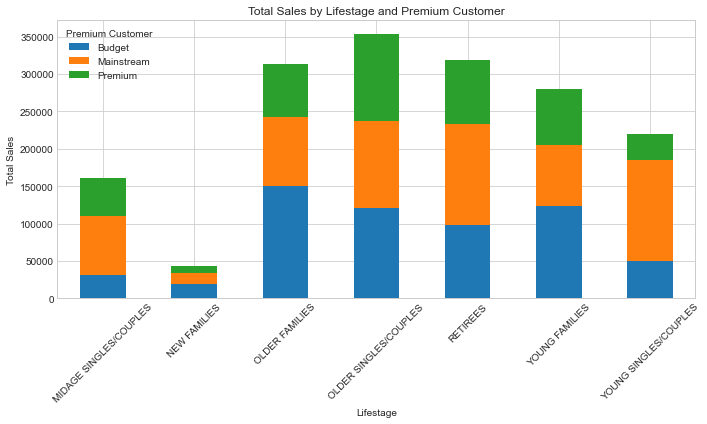

In [51]:
'''calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by
these segments to describe which customer segment contribute most to chip sales.'''

# aggregating the sales data by LIFESTAGE and PREMIUM_CUSTOMER
aggregated_sales = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# pivoting the aggregated sales data for plotting
pivot_sales = aggregated_sales.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES')

# creating a stacked bar plot
pivot_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.title('Total Sales by Lifestage and Premium Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper left')
plt.tight_layout()

plt.show()

Inference: 
    sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees 
    and Premium - Older singles/couples

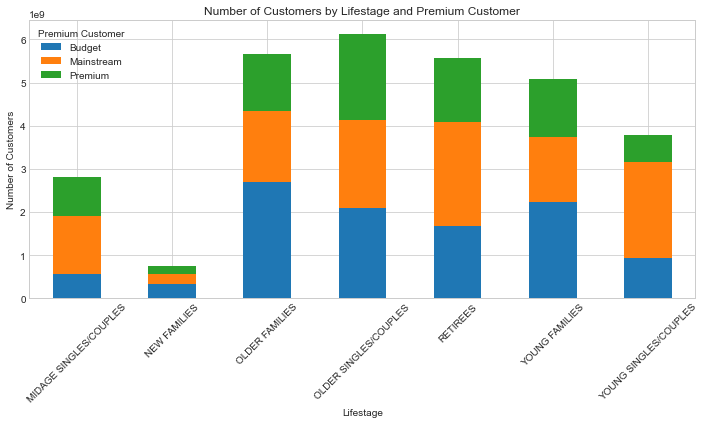

In [52]:
# now let’s see if the higher sales are due to there being more customers who buy chips

# aggregating the customers data by LIFESTAGE and PREMIUM_CUSTOMER
aggregated_customers = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].sum().reset_index()

# pivoting the aggregated customers data for plotting
pivot_customers = aggregated_customers.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR')

# creating a stacked bar plot
pivot_customers.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Lifestage and Premium Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper left')
plt.tight_layout()

plt.show()

Inference: 
    * There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. 
    This contributes to there being more sales to these customer segments but this is not a major 
    driver for the Budget- Older families segment.
    * Higher sales may also be driven by more units of chips being bought per customer. 
    Let’s have a look at this next.

In [53]:
# calculating the average units per customer
avg_units = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']) \
                .agg(AVG=pd.NamedAgg(column='PROD_QTY', aggfunc='sum')) \
                .reset_index()

# calculating the number of unique customers per group
unique_customers = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'] \
                       .nunique().reset_index()

# merging the two dataframes to calculate the average units per customer
avg_units = pd.merge(avg_units, unique_customers, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])
avg_units['AVG'] = avg_units['AVG'] / avg_units['LYLTY_CARD_NBR']

# sorting the dataframe by AVG in descending order
avg_units = avg_units.sort_values(by='AVG', ascending=False)

print(avg_units)

                 LIFESTAGE PREMIUM_CUSTOMER       AVG  LYLTY_CARD_NBR
7           OLDER FAMILIES       Mainstream  9.824771            2511
6           OLDER FAMILIES           Budget  9.646321            4145
8           OLDER FAMILIES          Premium  9.568238            2015
17          YOUNG FAMILIES          Premium  9.350919            2123
15          YOUNG FAMILIES           Budget  9.270110            3543
16          YOUNG FAMILIES       Mainstream  9.223154            2384
10   OLDER SINGLES/COUPLES       Mainstream  7.168618            4270
9    OLDER SINGLES/COUPLES           Budget  7.163544            4323
11   OLDER SINGLES/COUPLES          Premium  7.151573            4163
1   MIDAGE SINGLES/COUPLES       Mainstream  6.829619            2917
0   MIDAGE SINGLES/COUPLES           Budget  6.689935            1232
2   MIDAGE SINGLES/COUPLES          Premium  6.687375            1996
12                RETIREES           Budget  6.565959            3813
14                RE

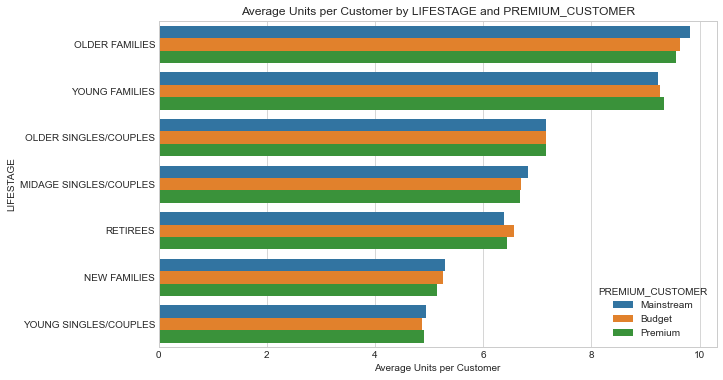

In [54]:
# creating a bar plot reprensentation of the above results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='AVG', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=avg_units)
plt.xlabel('Average Units per Customer')
plt.ylabel('LIFESTAGE')
plt.title('Average Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.legend(title='PREMIUM_CUSTOMER')

plt.show()

Inference: 
    * Older families and young families in general buy more chips per customer.
    * Now, let’s also investigate the average price per unit chips bought for each customer 
    segment as this is also adriver of total sales.

In [55]:
# calculating the average price per unit
avg_price = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']) \
                .agg(AVG=pd.NamedAgg(column='TOT_SALES', aggfunc='sum'),
                     PROD_QTY=pd.NamedAgg(column='PROD_QTY', aggfunc='sum')) \
                .reset_index()

avg_price['AVG'] = avg_price['AVG'] / avg_price['PROD_QTY']

# sorting the dataframe by AVG in descending order
avg_price = avg_price.sort_values(by='AVG', ascending=False)

print(avg_price)

                 LIFESTAGE PREMIUM_CUSTOMER       AVG  PROD_QTY
19   YOUNG SINGLES/COUPLES       Mainstream  4.084220     32978
1   MIDAGE SINGLES/COUPLES       Mainstream  3.992686     19922
4             NEW FAMILIES       Mainstream  3.961039      3714
3             NEW FAMILIES           Budget  3.950460      4784
12                RETIREES           Budget  3.940641     25036
14                RETIREES          Premium  3.928781     21716
11   OLDER SINGLES/COUPLES          Premium  3.903668     29772
5             NEW FAMILIES          Premium  3.899137      2548
9    OLDER SINGLES/COUPLES           Budget  3.890145     30968
13                RETIREES       Mainstream  3.866806     34916
10   OLDER SINGLES/COUPLES       Mainstream  3.829487     30610
2   MIDAGE SINGLES/COUPLES          Premium  3.795280     13348
0   MIDAGE SINGLES/COUPLES           Budget  3.768733      8242
15          YOUNG FAMILIES           Budget  3.766259     32844
17          YOUNG FAMILIES          Prem

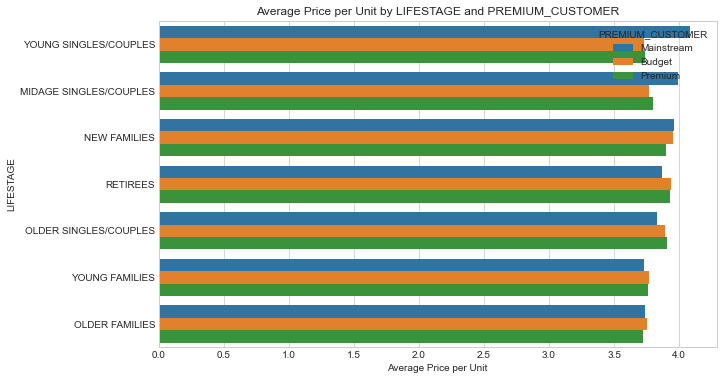

In [56]:
# creating a bar plot of the results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='AVG', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=avg_price)
plt.xlabel('Average Price per Unit')
plt.ylabel('LIFESTAGE')
plt.title('Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.legend(title='PREMIUM_CUSTOMER')

plt.show()

Inference: 
    Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their 
    budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when 
    they buy chips, this is mainly for entertainment purposes rather than their ownconsumption. This is also supported by 
    there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

# Deep dive into specific customer segments for insights

We have found quite a few interesting insights that we can dive deeper into. We might want to target customer segments 
that contribute the most to sales to retain them or further increase sales. Let’s look at Mainstream - young singles/couples. For instance, let’s find out if they tend to buy a particular brand of chips.

In [57]:
# creating a segment for "Mainstream, young singles/couples"
segment1 = df[(df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (df['PREMIUM_CUSTOMER'] == "Mainstream")]

# creating a segment for other groups
other = df[~((df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (df['PREMIUM_CUSTOMER'] == "Mainstream"))]

# calculating quantity for the segment and other
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# calculating brand affinity compared to the rest of the population
quantity_segment1_by_brand = segment1.groupby('BRAND').agg(targetSegment=('PROD_QTY', 'sum')) / quantity_segment1
quantity_other_by_brand = other.groupby('BRAND').agg(other=('PROD_QTY', 'sum')) / quantity_other

# merging the two dataframes and calculate brand affinity
brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, left_index=True, right_index=True)
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

print(brand_proportions)

            targetSegment     other  affinityToBrand
BRAND                                               
DORITOS          0.124447  0.101731         1.223293
TYRRELLS         0.031536  0.025797         1.222452
TWISTIES         0.046395  0.038065         1.218827
TOSTITOS         0.045546  0.038139         1.194210
PRINGLES         0.120383  0.100842         1.193786
KETTLE           0.198193  0.166654         1.189244
INFUZIONS        0.066044  0.057274         1.153119
COBS             0.045182  0.039386         1.147136
THINS            0.061556  0.057147         1.077165
GRNWVES          0.032203  0.031231         1.031128
CHEEZELS         0.018497  0.018492         1.000278
SMITHS           0.094184  0.124025         0.759393
FRENCH           0.003942  0.005640         0.698943
CHEETOS          0.007460  0.011860         0.628982
RRD              0.042028  0.066849         0.628697
NATURAL          0.019043  0.030435         0.625689
CCS              0.010613  0.018713         0.

Inference;

We can see that :
• Mainstream young singles/couples are 23% more likely to purchase Doritos chips compared to the rest of the population
• Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest of the population

Let’s also find out if our target segment tends to buy larger packs of chips.

In [58]:
# creating a segment for "Mainstream, young singles/couples"
segment1 = df[(df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (df['PREMIUM_CUSTOMER'] == "Mainstream")]

# creating a segment for other groups
other = df[~((df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (df['PREMIUM_CUSTOMER'] == "Mainstream"))]

# calculating quantity for the segment and other
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# calculating preferred pack size compared to the rest of the population
quantity_segment1_by_pack = segment1.groupby('PACK_SIZE').agg(targetSegment=('PROD_QTY', 'sum')) / quantity_segment1
quantity_other_by_pack = other.groupby('PACK_SIZE').agg(other=('PROD_QTY', 'sum')) / quantity_other

# merging the two dataframes and calculate pack affinity
pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, left_index=True, right_index=True)
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']
pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False)

print(pack_proportions)

           targetSegment     other  affinityToPack
PACK_SIZE                                         
270.0           0.032082  0.025228        1.271703
380.0           0.032446  0.025606        1.267126
330.0           0.061738  0.050450        1.223742
110.0           0.108375  0.090436        1.198363
134.0           0.120383  0.100842        1.193786
210.0           0.028807  0.025257        1.140555
250.0           0.014313  0.012837        1.114918
135.0           0.014434  0.013191        1.094216
170.0           0.080963  0.081067        0.998715
150.0           0.156711  0.163574        0.958041
175.0           0.254655  0.269692        0.944242
165.0           0.054461  0.061941        0.879226
190.0           0.007338  0.012287        0.597231
180.0           0.003396  0.005974        0.568493
160.0           0.006307  0.012115        0.520608
125.0           0.003032  0.005935        0.510944
90.0            0.006186  0.012361        0.500449
200.0           0.008854  0.018

Inference:
It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the 
rest of the population but let’s dive into what brands sell this pack size.

In [59]:
# Retrieve unique product names for PACK_SIZE == 270

unique_product_names = df[df['PACK_SIZE'] == 270]['PROD_NAME'].unique()
print(unique_product_names)

['Twisties Cheese     270g' 'Twisties Chicken270g']


From the results above, Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher 
likelihood of purchasing Twisties.

# Conclusion

Let’s recap what we’ve found:
    1. Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees 
    shoppers. 
    2. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more 
    of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet 
    of chips. This is indicative of impulse buying behaviour.
    3. We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Doritos chips compared to 
    the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some 
    Doritos and smaller packs of chips in discretionary space near segments where young singles and couples frequent more 
    often to increase visibilty and impulse behaviour.
     4. A further analysis can help the Category Manager with recommendations of where these segments are and further help
     them with measuring the impact of the changed placement in subsequent analysis.